# Deep Analysis of Indonesian Tourism

## Defining Questions

1. What is the most expensive tourism destination in each city?
2. Are there free tourism destinations in each city? If yes, what city that has either the highest or the lowest total of free tourism destinations?
3. Is there any tourism destination that is free and has perfect 5.0 rating? If yes, what is it?
4. What is the most visited tourism destination in each city?

## Importing Library

First, we need to import all necessary library that will be used for this analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Gathering Data

In [ ]:
package_tourism_df = pd.read_csv("/content/drive/My Drive/Analysing Data/01 Indonesian Tourism/package_tourism.csv")
print(package_tourism_df.shape)
package_tourism_df.head()

(100, 7)


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


From the table above, we see that the package_tourism.csv only contain cities and their tourism places. Thus we will ignore this dataset.

In [ ]:
tourism_rating_df = pd.read_csv("/content/drive/My Drive/Analysing Data/01 Indonesian Tourism/tourism_rating.csv")
print(tourism_rating_df.shape)
tourism_rating_df.head()

(10000, 3)


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


From the table above, we see that the tourism_rating.csv has 10000 rows that contains user_id (the visitors) and their ratings on the places that they have visited. Thus we will use this dataset into our analysis.

In [ ]:
tourism_with_id_df = pd.read_csv("/content/drive/My Drive/Analysing Data/01 Indonesian Tourism/tourism_with_id.csv")
print(tourism_with_id_df.shape)
tourism_with_id_df.head()

(437, 13)


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


From the table above, we see that the tourism_with_id.csv has 437 rows of unique Place_Id, which means there are 437 tourism places in this dataset. Some of the columns such as price and rating are useful to be analysed, thus we will use this dataset into our analysis.

In [ ]:
user_df = pd.read_csv("/content/drive/My Drive/Analysing Data/01 Indonesian Tourism/user.csv")
print(user_df.shape)
user_df.head()

(300, 3)


,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


From the table above, we see that the user.csv has 300 rows of unique User_Id, which means there are 300 visitors in this dataset with their domicile and age. However, for this analysis, we will not use this dataset.

## Assessing Data

We now know that only `tourism_with_id` and `tourism_rating` datasets that will be used. So we will examine these datasets.

### tourism_rating

First, we will find the general information of this dataset with `.info()`

In [ ]:
tourism_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


We see that there are 10000 non-null entries, which mean there are 0 missing values and 0 null values. Then we will check if there's any duplicate value.

In [ ]:
print(f"Total duplicate values: {tourism_rating_df.duplicated().sum()}")

Total duplicate values: 79


We see that there are 79 duplicated values in this dataset, so we will clean this later in the Cleaning Data Section. Next, we will check the detail of the dataset with the `.describe()`.

In [ ]:
tourism_rating_df.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


We see that `User_Id` is ranging from 1 to 300, `Place_Id` is ranging from 1 to 437, and `Place_Ratings` is ranging from 1 to 5. These are accurate, since we have 300 visitors with 437 unique tourism destinations with rating between 1 and 5. So there are 0 outliers or inaccurate data.

### tourism_with_id

First, we will find the general information of this dataset with `.info()`

In [ ]:
tourism_with_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


We see that column `Time_Minutes` and `Unnamed: 11` have 205 non-null and 0 non-null entries respectively, while the other columns have 437 non-null entries. This means that these two columns have null values. So we will check for any null value in all columns.

In [ ]:
tourism_with_id_df.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

There are 237 and 437 null values on `Time_Minutes` and `Unnamed: 11` columns respectively. For this analysis however, we only need column `Place_Id`, `Place_Name`, `Category`, `City`, `Price`, and `Rating`, so we will clean this later in the Cleaning Data Section. Next, we will check for any duplicate values.

In [ ]:
print(f"Total duplicate values: {tourism_with_id_df.duplicated().sum()}")

Total duplicate values: 0


We see that there are 0 duplicate values, so we don't need to drop any rows. Next, we will check the detail of the dataset with the `.describe()`.

In [ ]:
tourism_with_id_df.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


Since we only need to focus on`Place_Id`, `Place_Name`, `Category`, `City`, `Price`, and `Rating` columns, we see that column `Place_Id` is accurate since there are 437 unique tourism destinations and column `Rating` is also accurate since rating can range from 1 to 5. For `Price` column, we have to think that a tourism destination can be either free or very expensive. So there are 0 outliers or inaccurate values.

## Cleaning Data

### tourism_rating

We know that from Assessing Data Section, there are duplicate values. Thus, we will remove all of the duplicated values.

In [ ]:
tourism_rating_df = tourism_rating_df.drop_duplicates()
tourism_rating_df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Now that we have cleared the duplicate values, we will check again the dataset after being cleaned.

In [ ]:
tourism_rating_df.describe()

,User_Id,Place_Id,Place_Ratings
count,9921.000000,9921.000000,9921.000000
mean,151.337970,219.486745,3.066929
std,86.107089,126.164097,1.380070
min,1.000000,1.000000,1.000000
25%,77.000000,109.000000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


We see that now it has 9921 rows, which is equivalent from removing 79 rows from 10000 rows. To make sure there are no duplicate values, we will check again with `.duplicated()`

In [ ]:
print(f"Total duplicate values: {tourism_rating_df.duplicated().sum()}")

Total duplicate values: 0


Now that there are no duplicate values, this dataset is ready for analysis.

### tourism_with_id

From the `tourism_with_id` dataset, we only need to focus on their `Place_Id`, `Place_Name`, `Category`, `City`, `Price`, and `Rating`. So we will remove the rest of the columns with `.drop()`.

In [ ]:
tourism_with_id_df = tourism_with_id_df.drop(["Description", "Time_Minutes", "Coordinate", "Lat", "Long", "Unnamed: 11", "Unnamed: 12"], axis = 1)
tourism_with_id_df.head()

,Place_Id,Place_Name,Category,City,Price,Rating
0,1,Monumen Nasional,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5


Now that we have remove all unnecessary columns, we need to make sure that this dataset is ready to be analysed. First, we will use `.info()` to get general information.

In [ ]:
tourism_with_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Place_Id    437 non-null    int64  
 1   Place_Name  437 non-null    object 
 2   Category    437 non-null    object 
 3   City        437 non-null    object 
 4   Price       437 non-null    int64  
 5   Rating      437 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 20.6+ KB


We see that there are 0 null values. Now we need to check for any duplicate value.

In [ ]:
print(f"Total duplicate values: {tourism_with_id_df.duplicated().sum()}")

Total duplicate values: 0


We see that there are 0 duplicated values. Now we need to check again the detail of the dataset.

In [ ]:
tourism_with_id_df.describe()

,Place_Id,Price,Rating
count,437.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792
std,126.295289,66446.374709,0.208587
min,1.000000,0.000000,3.400000
25%,110.000000,0.000000,4.300000
50%,219.000000,5000.000000,4.500000
75%,328.000000,20000.000000,4.600000
max,437.000000,900000.000000,5.000000


We see that nothing is changed from previous in Assessing Data Section. This means this dataset is ready for analysis.

## Exploratory Data Analysis

### Getting All Cities and Their Category

For starting, we need to find out what are all cities in the `tourism_with_id` dataset.

In [ ]:
tourism_with_id_df.City.value_counts()

City
Yogyakarta    126
Bandung       124
Jakarta        84
Semarang       57
Surabaya       46
Name: count, dtype: int64

We see that there are 5 cities in this dataset. We will analyse each of these cities later. Now we need to find out all categories of tourism destinations in this dataset.

In [ ]:
tourism_with_id_df.Category.value_counts()

Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64

We see that there are 6 categories of tourism destinations in this dataset.

Now, we will analyse tourism destinations in each city.

### Yogyakarta

First, we need to create DataFrame that contain tourism destinations from Yogyakarta.

In [ ]:
yogyakarta_df = tourism_with_id_df[tourism_with_id_df["City"] == "Yogyakarta"]
yogyakarta_df = yogyakarta_df.drop("City", axis = 1)
yogyakarta_df.head()

,Place_Id,Place_Name,Category,Price,Rating
84,85,Taman Pintar Yogyakarta,Taman Hiburan,6000,4.5
85,86,Keraton Yogyakarta,Budaya,15000,4.6
86,87,Sindu Kusuma Edupark (SKE),Taman Hiburan,20000,4.2
87,88,Museum Benteng Vredeburg Yogyakarta,Budaya,3000,4.6
88,89,De Mata Museum Jogja,Budaya,50000,4.4


Next, we need to see how many tourism destination for each category in Yogyakarta.

In [ ]:
column_yogyakarta = ["Category", "Place_Name"]
category_yogyakarta_df = pd.pivot_table(
    yogyakarta_df[column_yogyakarta], values = ["Place_Name"], index = "Category", aggfunc = "nunique"
    ).reset_index()
category_yogyakarta_df.sort_values(by = 'Place_Name', ascending = False, inplace = True)
category_yogyakarta_df.rename(columns = {'Place_Name': 'Jumlah'}, inplace = True)
category_yogyakarta_df

,Category,Jumlah
4,Taman Hiburan,36
0,Bahari,34
1,Budaya,30
2,Cagar Alam,23
3,Pusat Perbelanjaan,3


We see that Taman Hiburan is the category that has the most tourism destinations in Yogyakarta.

Then, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_yogyakarta_df = yogyakarta_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations in Yogyakarta.

In [ ]:
expensive_price_yogyakarta_df = price_yogyakarta_df.sort_values(by = 'Price', ascending = False)
expensive_price_yogyakarta_df.head(10)

,Place_Name,Price,Rating
143,Goa Jomblang,500000,4.6
119,Bukit Panguk Kediwung,250000,4.5
161,Kampung Wisata Dipowinatan,220000,4.5
182,Jogja Bay Pirates Adventure Waterpark,150000,4.4
174,Museum Ullen Sentalu,100000,4.7
178,Candi Ratu Boko,75000,4.6
92,Gembira Loka Zoo,60000,4.5
204,Desa Wisata Tembi,50000,4.5
192,Candi Sewu,50000,4.6
169,Candi Borobudur,50000,4.7


We see that Goa Jomblang is the most expensive tourism destination in Yogyakarta. This is how it looks when we visualize it.

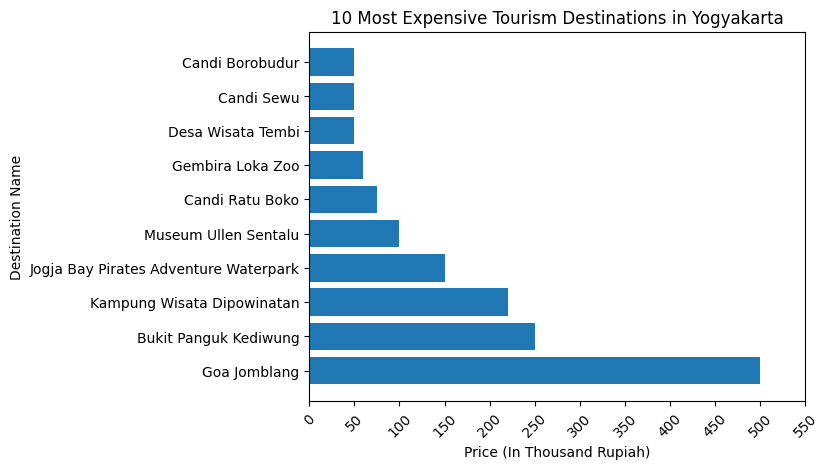

In [ ]:
plt.barh(
    y = expensive_price_yogyakarta_df['Place_Name'].head(10),
    width = (expensive_price_yogyakarta_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Yogyakarta')
plt.xticks(np.arange(0, 600, 50), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

If there are expensive tourism destinations, can we find at least 10 free tourism destinations? We will check that.

In [ ]:
free_yogyakarta_df = price_yogyakarta_df.sort_values(by = 'Price', ascending = False)
print(f"Total of free tourism destination in Yogyakarta: {free_yogyakarta_df['Price'].value_counts()[0]}")
free_yogyakarta_df.tail(10)

Total of free tourism destination in Yogyakarta: 25


,Place_Name,Price,Rating
141,Ledok Sambi,0,4.6
112,Gedung Agung Yogyakarta,0,4.6
173,Pasar Beringharjo,0,4.5
139,Bendung Lepen,0,4.6
134,Kawasan Wisata Sosrowijayan,0,4.0
159,Pasar Kebon Empring Bintaran,0,4.4
122,Kampung Wisata Rejowinangun,0,4.3
123,Kauman Pakualaman Yogyakarta,0,5.0
124,Alun-alun Utara Keraton Yogyakarta,0,4.6
150,Desa Wisata Kelor,0,4.4


Yes, we see that there are 25 tourism destinations in Yogyakarta that are free of cost.

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_yogyakarta_df = price_yogyakarta_df.sort_values(by = 'Rating', ascending = False)
highest_rating_yogyakarta_df.head()

,Place_Name,Price,Rating
94,Desa Wisata Sungai Code Jogja Kota,0,5.0
123,Kauman Pakualaman Yogyakarta,0,5.0
105,Kawasan Malioboro,0,4.8
138,Puncak Gunung Api Purba - Nglanggeran,10000,4.7
174,Museum Ullen Sentalu,100000,4.7


We see that both Desa Wisata Sungai Code Jogja Kota and Kauman Pakualaman Yogyakarta have perfect 5.0 rating. In fact, we can actually see that top three rating-based tourism destinations are free as well!

Now, we want to see what is the most visited tourism destination in Yogyakarta with their rating and price.

In [ ]:
destination_yogyakarta_df = pd.merge(
    left = yogyakarta_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitors_yogyakarta_df = destination_yogyakarta_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitors_yogyakarta_df.rename(columns = {'Place_Id': 'Number of Visit(s)'}, inplace = True)
total_visitors_yogyakarta_df.head()

,Number of Visit(s),Rating,Price
Place_Name,,,
Pantai Parangtritis,37,4.5,10000
Taman Sungai Mudal,36,4.6,10000
Pantai Kesirat,34,4.6,5000
Geoforest Watu Payung Turunan,33,4.5,0
Museum Benteng Vredeburg Yogyakarta,32,4.6,3000


We see that Pantai Parangtritis is the most popular tourism destionation among others in Yogyakarta.

### Bandung

First, we need to create DataFrame that contain tourism destinations from Bandung.

In [ ]:
bandung_df = tourism_with_id_df[tourism_with_id_df["City"] == "Bandung"]
bandung_df = bandung_df.drop("City", axis = 1)
bandung_df.head()

,Place_Id,Place_Name,Category,Price,Rating
210,211,GunungTangkuban perahu,Cagar Alam,30000,4.5
211,212,Jalan Braga,Budaya,0,4.7
212,213,Gedung Sate,Budaya,5000,4.6
213,214,Trans Studio Bandung,Taman Hiburan,280000,4.5
214,215,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,15000,4.5


Next, we need to see how many tourism destination for each category in Bandung.

In [ ]:
kolom_bandung = ["Category", "Place_Name"]
category_bandung_df = pd.pivot_table(
    bandung_df[kolom_bandung], values = ["Place_Name"], index = "Category", aggfunc = "nunique"
    ).reset_index()
category_bandung_df.sort_values(by = 'Place_Name', ascending = False, inplace = True)
category_bandung_df.rename(columns = {'Place_Name': 'Jumlah'}, inplace = True)
category_bandung_df

,Category,Jumlah
1,Cagar Alam,54
3,Taman Hiburan,39
0,Budaya,22
4,Tempat Ibadah,8
2,Pusat Perbelanjaan,1


We see that Cagar Alam is the category that has the most tourism destinations in Bandung.

Then, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_bandung_df = bandung_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations in Bandung.

In [ ]:
expensive_price_bandung_df = price_bandung_df.sort_values(by = 'Price', ascending = False)
expensive_price_bandung_df.head(10)

,Place_Name,Price,Rating
296,Mountain View Golf Club,375000,4.4
213,Trans Studio Bandung,280000,4.5
330,Kyotoku Floating Market,175000,4.5
305,Sungai Palayangan,150000,4.6
248,Upside Down World Bandung,100000,4.0
217,Kawah Putih,81000,4.5
236,Panghegar Waterboom Bandung,75000,4.3
324,Saung Angklung Mang Udjo,75000,4.7
233,Amazing Art World,75000,4.5
295,Batununggal Indah Club,70000,4.4


We see that Mountain View Golf Club is the most expensive tourism destination in Bandung. This is how it looks when we visualize it.

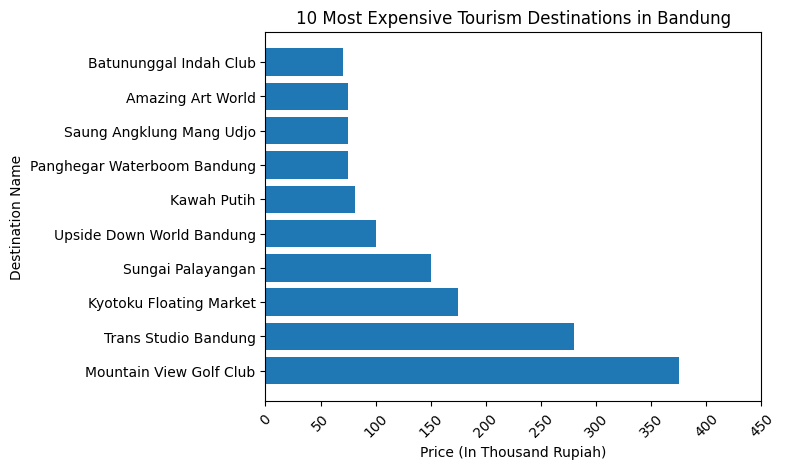

In [ ]:
plt.barh(
    y = expensive_price_bandung_df['Place_Name'].head(10),
    width = (expensive_price_bandung_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Bandung')
plt.xticks(np.arange(0, 500, 50), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

If there are expensive tourism destinations, then is there any free tourism destination in Bandung? We will check that.

In [ ]:
free_bandung_df = price_bandung_df.sort_values(by = 'Price', ascending = False)
print(f"Total of free tourism destination in Bandung: {free_bandung_df['Price'].value_counts()[0]}")
free_bandung_df.tail(10)

Total of free tourism destination in Bandung: 37


,Place_Name,Price,Rating
235,Taman Balai Kota Bandung,0,4.6
279,Gereja Tiberias Indonesia Bandung,0,4.9
278,Masjid Agung Trans Studio Bandung,0,4.8
301,Masjid Pusdai,0,4.7
302,Masjid Al-Imtizaj,0,4.7
277,Masjid Daarut Tauhiid Bandung,0,4.9
273,Babakan Siliwangi City Forest Path Bandung,0,4.6
211,Jalan Braga,0,4.7
271,Taman Budaya Jawa Barat,0,4.3
285,Roemah Seni Sarasvati,0,4.4


Yes, we see that there are 37 tourism destinations in Bandung that are free of cost.

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_bandung_df = price_bandung_df.sort_values(by = 'Rating', ascending = False)
highest_rating_bandung_df.head()

,Place_Name,Price,Rating
277,Masjid Daarut Tauhiid Bandung,0,4.9
279,Gereja Tiberias Indonesia Bandung,0,4.9
322,Kebun Tanaman Obat Sari Alam,0,4.9
278,Masjid Agung Trans Studio Bandung,0,4.8
287,Masjid Salman ITB,0,4.8


We see that there are 3 tourism destination that have same 4.9 rating. In fact, we can actually see that top five rating-based tourism destinations are free as well!

Now, we want to see what is the most visited tourism destination in Bandung with their rating and price.

In [ ]:
destination_bandung_df = pd.merge(
    left = bandung_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitors_bandung_df = destination_bandung_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitors_bandung_df.rename(columns = {'Place_Id': 'Number of Visit(s)'}, inplace = True)
total_visitors_bandung_df.head()

,Number of Visit(s),Rating,Price
Place_Name,,,
Gunung Lalakon,39,4.8,0
NuArt Sculpture Park,33,4.7,50000
Kampung Batu Malakasari,33,4.1,10000
Taman Film,33,4.3,0
Kyotoku Floating Market,32,4.5,175000


We see that Gunung Lalakon is the most popular tourism destionation among others in Bandung.

### Jakarta

First, we need to create DataFrame that contain tourism destinations from Jakarta.

In [ ]:
jakarta_df = tourism_with_id_df[tourism_with_id_df["City"] == "Jakarta"]
jakarta_df = jakarta_df.drop("City", axis = 1)
jakarta_df.head()

,Place_Id,Place_Name,Category,Price,Rating
0,1,Monumen Nasional,Budaya,20000,4.6
1,2,Kota Tua,Budaya,0,4.6
2,3,Dunia Fantasi,Taman Hiburan,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5
4,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5


Next, we need to see how many tourism destination for each category in Jakarta.

In [ ]:
column_jakarta = ["Category", "Place_Name"]
category_jakarta_df = pd.pivot_table(
    jakarta_df[column_jakarta], values = ["Place_Name"], index = "Category", aggfunc = "nunique"
    ).reset_index()
category_jakarta_df.sort_values(by = 'Place_Name', ascending = False, inplace = True)
category_jakarta_df.rename(columns = {'Place_Name': 'Jumlah'}, inplace = True)
category_jakarta_df

,Category,Jumlah
1,Budaya,32
4,Taman Hiburan,27
3,Pusat Perbelanjaan,10
0,Bahari,8
2,Cagar Alam,4
5,Tempat Ibadah,3


We see that Budaya is the category that has the most tourism destinations in Jakarta.

Then, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_jakarta_df = jakarta_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations in Jakarta.

In [ ]:
expensive_price_jakarta_df = price_jakarta_df.sort_values(by = 'Price', ascending = False)
expensive_price_jakarta_df.head(10)

,Place_Name,Price,Rating
13,Pulau Pelangi,900000,4.8
71,Waterboom PIK (Pantai Indah Kapuk),300000,4.4
2,Dunia Fantasi,270000,4.6
82,Alive Museum Ancol,200000,4.3
18,Kidzania,185000,4.6
44,Jakarta Aquarium dan Safari,185000,4.6
7,Ocean Ecopark,180000,4.0
74,SnowBay Waterpark,180000,4.3
8,Pelabuhan Marina,175000,4.4
9,Pulau Tidung,150000,4.5


We see that Pulau Pelangi is the most expensive tourism destination in Jakarta. This is how it looks when we visualize it.

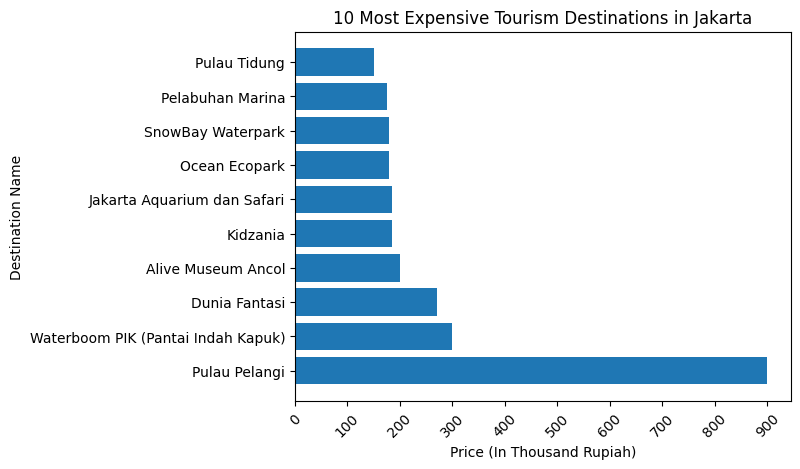

In [ ]:
plt.barh(
    y = expensive_price_jakarta_df['Place_Name'].head(10),
    width = (expensive_price_jakarta_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Jakarta')
plt.xticks(np.arange(0, 1000, 100), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

If there are expensive tourism destinations, then is there any free tourism destination in Jakarta? We will check that.

In [ ]:
free_jakarta_df = price_jakarta_df.sort_values(by = 'Price', ascending = False)
print(f"Total of free tourism destination in Jakarta: {free_jakarta_df['Price'].value_counts()[0]}")
free_jakarta_df.tail(10)

Total of free tourism destination in Jakarta: 32


,Place_Name,Price,Rating
57,Taman Ayodya,0,4.4
1,Kota Tua,0,4.6
43,Monumen Selamat Datang,0,4.7
46,Taman Situ Lembang,0,4.5
48,Galeri Indonesia Kaya,0,4.8
53,Taman Agrowisata Cilangkap,0,4.2
54,Klenteng Jin De Yuan,0,4.5
24,Pasar Tanah Abang,0,4.0
56,Taman Lapangan Banteng,0,4.7
83,Kawasan Kuliner BSM,0,4.6


Yes, we see that there are 32 tourism destinations in Jakarta that are free of cost.

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_jakarta_df = price_jakarta_df.sort_values(by = 'Rating', ascending = False)
highest_rating_jakarta_df.head()

,Place_Name,Price,Rating
28,Wisata Kuliner Pecenongan,0,5.0
68,Freedom Library,0,5.0
13,Pulau Pelangi,900000,4.8
48,Galeri Indonesia Kaya,0,4.8
22,Gereja Katedral,0,4.8


We see that both Wisata Kuliner Pecenongan and Freedom Library have perfect 5.0 rating. They both are free as well!

Now, we want to see what is the most visited tourism destination in Jakarta with their rating and price.

In [ ]:
destination_jakarta_df = pd.merge(
    left = jakarta_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitors_jakarta_df = destination_jakarta_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitors_jakarta_df.rename(columns = {'Place_Id': 'Number of Visit(s)'}, inplace = True)
total_visitors_jakarta_df.head()

,Number of Visit(s),Rating,Price
Place_Name,,,
Wisata Kuliner Pecenongan,33,5.0,0
Klenteng Jin De Yuan,32,4.5,0
Rumah Sipitung,30,4.5,5000
The Escape Hunt,30,4.4,70000
Ocean Ecopark,30,4.0,180000


We see that Wisata Kuliner Pecenongan is the most popular tourism destination among others in Jakarta.

### Semarang

First, we need to create DataFrame that contain tourism destinations from Semarang.

In [ ]:
semarang_df = tourism_with_id_df[tourism_with_id_df["City"] == "Semarang"]
semarang_df = semarang_df.drop("City", axis = 1)
semarang_df.head()

,Place_Id,Place_Name,Category,Price,Rating
334,335,Candi Gedong Songo,Budaya,10000,4.5
335,336,Grand Maerakaca,Taman Hiburan,15000,4.4
336,337,Kampung Pelangi,Taman Hiburan,3000,4.3
337,338,Lawang Sewu,Budaya,10000,4.6
338,339,Sam Poo Kong Temple,Budaya,35000,4.5


Next, we need to see how many tourism destination for each category in Semarang.

In [ ]:
column_semarang = ["Category", "Place_Name"]
category_semarang_df = pd.pivot_table(
    semarang_df[column_semarang], values = ["Place_Name"], index = "Category", aggfunc = "nunique"
    ).reset_index()
category_semarang_df.sort_values(by = 'Place_Name', ascending = False, inplace = True)
category_semarang_df.rename(columns = {'Place_Name': 'Jumlah'}, inplace = True)
print(category_semarang_df)

        Category  Jumlah
2     Cagar Alam      20
1         Budaya      15
3  Taman Hiburan      15
0         Bahari       4
4  Tempat Ibadah       3


We see that Cagar Alam is the category that has the most tourism destinations in Semarang.

Then, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_semarang_df = semarang_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations in Semarang.

In [ ]:
expensive_price_semarang_df = price_semarang_df.sort_values(by = 'Price', ascending = False)
expensive_price_semarang_df.head(10)

,Place_Name,Price,Rating
381,Kampoeng Kopi Banaran,200000,4.3
355,Saloka Theme Park,150000,4.4
363,Water Blaster Bukit Candi Golf,80000,4.2
354,Umbul Sidomukti,75000,4.6
350,Old City 3D Trick Art Museum,50000,4.4
338,Sam Poo Kong Temple,35000,4.5
376,La Kana Chapel,35000,4.5
375,Semarang Chinatown,30000,4.5
387,Watu Gunung Ungaran,25000,4.4
370,Wisata Eling Bening,25000,4.3


We see that Kampoeng Kopi Banaran is the most expensive tourism destination in Semarang. This is how it looks when we visualize it.

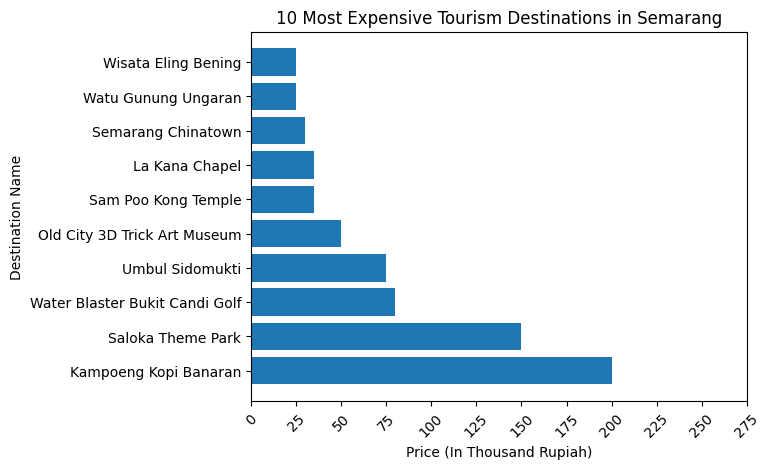

In [ ]:
plt.barh(
    y = expensive_price_semarang_df['Place_Name'].head(10),
    width = (expensive_price_semarang_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Semarang')
plt.xticks(np.arange(0, 300, 25), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

If there are expensive tourism destinations, can we find at least 10 free tourism destinations? We will check that.

In [ ]:
free_semarang_df = price_semarang_df.sort_values(by = 'Price', ascending = False)
print(f"Total of free tourism destination in Semarang: {free_semarang_df['Price'].value_counts()[0]}")
free_semarang_df.tail(10)

Total of free tourism destination in Semarang: 14


,Place_Name,Price,Rating
345,Indonesia Kaya Park,0,4.6
351,GPIB Immanuel Semarang (Gereja Blenduk),0,4.6
339,Desa Wisata Lembah Kalipancur,0,3.9
382,Taman Tabanas,0,4.4
383,Kampung Tematik Jawi,0,4.5
357,Masjid Kapal Semarang,0,4.1
380,Tugu Muda Semarang,0,4.7
346,Taman Pandanaran,0,4.4
377,Jembatan Biru Ambarawa,0,4.2
379,Masjid Agung Ungaran,0,4.7


Yes, we see that there are 14 tourism destinations in Semarang that are free of cost.

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_semarang_df = price_semarang_df.sort_values(by = 'Rating', ascending = False)
highest_rating_semarang_df.head()

,Place_Name,Price,Rating
371,Gua Maria Kerep Ambarawa,2000,4.8
374,Kota Lama Semarang,0,4.7
347,Pura Giri Natha,20000,4.7
344,Kampoeng Djadhoel Semarang,10000,4.7
380,Tugu Muda Semarang,0,4.7


We see that Gua Maria Kerep Ambarawa has the highest rating among others in Semarang, which has 4.8 rating.

Now, we want to see what is the most visited tourism destination in Semarang with their rating and price.

In [ ]:
destination_semarang_df = pd.merge(
    left = semarang_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitors_semarang_df = destination_semarang_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitors_semarang_df.rename(columns = {'Place_Id': 'Number of Visit(s)'}, inplace = True)
total_visitors_semarang_df.head()

,Number of Visit(s),Rating,Price
Place_Name,,,
Grand Maerakaca,33,4.4,15000
Pantai Marina,33,4.1,3000
Tirto Argo Siwarak,31,4.4,20000
La Kana Chapel,31,4.5,35000
Monumen Palagan Ambarawa,31,4.4,7500


We see that Grand Maerakaca and Pantai marina are the most popular tourism destination among others in Semarang.

### Surabaya

First, we need to create DataFrame that contain tourism destinations from Surabaya.

In [ ]:
surabaya_df = tourism_with_id_df[tourism_with_id_df["City"] == "Surabaya"]
surabaya_df = surabaya_df.drop("City", axis = 1)
surabaya_df.head()

,Place_Id,Place_Name,Category,Price,Rating
391,392,Ekowisata Mangrove Wonorejo,Cagar Alam,0,4.3
392,393,Taman Harmoni Keputih,Cagar Alam,0,4.4
393,394,Air Mancur Menari,Taman Hiburan,35000,4.4
394,395,Taman Prestasi,Taman Hiburan,0,4.6
395,396,Monumen Kapal Selam,Budaya,15000,4.4


Next, we need to see how many tourism destination for each category in Surabaya.

In [ ]:
column_surabaya = ["Category", "Place_Name"]
category_surabaya_df = pd.pivot_table(
    surabaya_df[column_surabaya], values = ["Place_Name"], index = "Category", aggfunc = "nunique"
    ).reset_index()
category_surabaya_df.sort_values(by = 'Place_Name', ascending = False, inplace = True)
category_surabaya_df.rename(columns = {'Place_Name': 'Jumlah'}, inplace = True)
print(category_surabaya_df)

             Category  Jumlah
1              Budaya      18
4       Taman Hiburan      18
2          Cagar Alam       5
5       Tempat Ibadah       3
0              Bahari       1
3  Pusat Perbelanjaan       1


We see that Budaya and Taman Hiburan are the category that have the most tourism destinations in Surabaya.

Then, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_surabaya_df = surabaya_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations in Semarang.

In [ ]:
expensive_price_surabaya_df = price_surabaya_df.sort_values(by = 'Price', ascending = False)
expensive_price_surabaya_df.head(10)

,Place_Name,Price,Rating
429,Atlantis Land Surabaya,125000,4.4
409,Ciputra Waterpark,95000,4.3
404,Surabaya North Quay,50000,4.4
393,Air Mancur Menari,35000,4.4
424,Waterpark Kenjeran Surabaya,35000,4.1
403,Kenjeran Park,35000,4.2
407,Kebun Binatang Surabaya,15000,4.3
395,Monumen Kapal Selam,15000,4.4
423,Pantai Ria Kenjeran,15000,4.2
436,Gereja Perawan Maria Tak Berdosa Surabaya,10000,4.8


We see that Atlantis Land Surabaya is the most expensive tourism destination in Surabaya. This is how it looks when we visualize it.

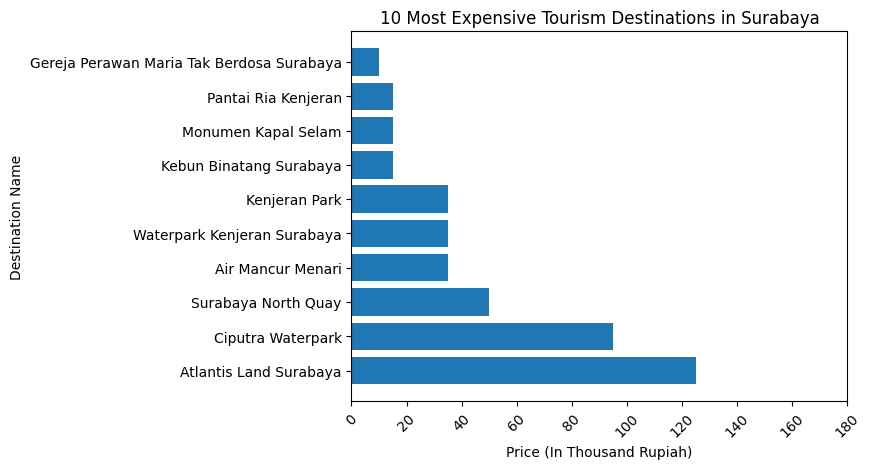

In [ ]:
plt.barh(
    y = expensive_price_surabaya_df['Place_Name'].head(10),
    width = (expensive_price_surabaya_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Surabaya')
plt.xticks(np.arange(0, 200, 20), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

If there are expensive tourism destinations, can we find at least 10 free tourism destinations? We will check that.

In [ ]:
free_surabaya_df = price_surabaya_df.sort_values(by = 'Price', ascending = False)
print(f"Total of free tourism destination in Surabaya: {free_surabaya_df['Price'].value_counts()[0]}")
free_surabaya_df.tail(10)

Total of free tourism destination in Surabaya: 29


,Place_Name,Price,Rating
400,Taman Keputran,0,4.3
401,Food Junction Grand Pakuwon,0,4.5
415,Keraton Surabaya,0,4.4
392,Taman Harmoni Keputih,0,4.4
413,Jembatan Merah,0,4.5
411,Masjid Nasional Al-Akbar,0,4.9
410,Masjid Muhammad Cheng Hoo,0,4.7
402,Taman Barunawati,0,4.2
408,Rumah Batik,0,4.5
391,Ekowisata Mangrove Wonorejo,0,4.3


Yes, we see that there are 29 tourism destinations in Surabaya that are free of cost.

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_surabaya_df = price_surabaya_df.sort_values(by = 'Rating', ascending = False)
highest_rating_surabaya_df.head()

,Place_Name,Price,Rating
411,Masjid Nasional Al-Akbar,0,4.9
436,Gereja Perawan Maria Tak Berdosa Surabaya,10000,4.8
410,Masjid Muhammad Cheng Hoo,0,4.7
425,Balai Kota Surabaya,0,4.7
418,Monumen Tugu Pahlawan,0,4.7


We see that Masjid Nasional Al-Akbar has the highest rating among others in Surabaya, which has 4.9 rating, and free as well!

Now, we want to see what is the most visited tourism destination in Surabaya with their rating and price.

In [ ]:
destination_surabaya_df = pd.merge(
    left = surabaya_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitors_surabaya_df = destination_surabaya_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitors_surabaya_df.rename(columns = {'Place_Id': 'Number of Visit(s)'}, inplace = True)
total_visitors_surabaya_df.head()

,Number of Visit(s),Rating,Price
Place_Name,,,
Gereja Perawan Maria Tak Berdosa Surabaya,37,4.8,10000
Food Junction Grand Pakuwon,32,4.5,0
Atlantis Land Surabaya,32,4.4,125000
Keraton Surabaya,30,4.4,0
Kebun Bibit Wonorejo,29,4.4,0


We see that Gereja Perawan Maria Tak Berdosa Surabaya	is the most popular tourism destination among others in Surabaya.

### Top 10 Most Expensive Tourism Destination Across All Cities

Now that we have analyse each of city, we will analyse all of cities together.

First, we will create a new DataFrame containing `Place_Name`, `Price`, `Rating` to focus on these columns.

In [ ]:
price_df = tourism_with_id_df[['Place_Name', 'Price', 'Rating']]

We will use descending sort based on `Price` to show some of most expensive tourism destinations acroll all cities.

In [ ]:
expensive_price_df = price_df.sort_values(by = 'Price', ascending = False)
expensive_price_df.head(10)

,Place_Name,Price,Rating
13,Pulau Pelangi,900000,4.8
143,Goa Jomblang,500000,4.6
296,Mountain View Golf Club,375000,4.4
71,Waterboom PIK (Pantai Indah Kapuk),300000,4.4
213,Trans Studio Bandung,280000,4.5
2,Dunia Fantasi,270000,4.6
119,Bukit Panguk Kediwung,250000,4.5
161,Kampung Wisata Dipowinatan,220000,4.5
381,Kampoeng Kopi Banaran,200000,4.3
82,Alive Museum Ancol,200000,4.3


We see that Pulau Pelangi is the most expensive tourism destination located in Jakarta. This is how it looks when we visualize it.

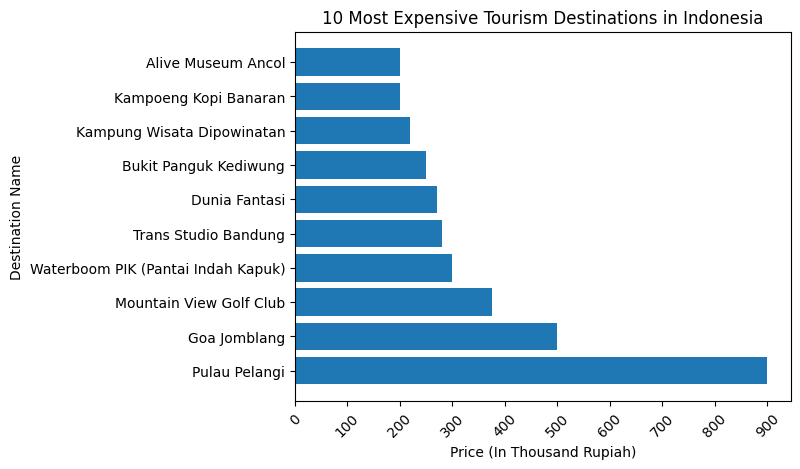

In [ ]:
plt.barh(
    y = expensive_price_df['Place_Name'].head(10),
    width = (expensive_price_df['Price']/1000).head(10)
)
plt.title('10 Most Expensive Tourism Destinations in Indonesia')
plt.xticks(np.arange(0, 1000, 100), rotation = 45)
plt.xlabel('Price (In Thousand Rupiah)')
plt.ylabel('Destination Name')
plt.show()

### Top 10 Highest Rating Tourism Destination Across All Cities

Next, we will find out some of tourism destinations that have highest rating.

In [ ]:
highest_rating_df = price_df.sort_values(by = 'Rating', ascending = False)
highest_rating_df.head(10)

,Place_Name,Price,Rating
68,Freedom Library,0,5.0
94,Desa Wisata Sungai Code Jogja Kota,0,5.0
123,Kauman Pakualaman Yogyakarta,0,5.0
28,Wisata Kuliner Pecenongan,0,5.0
277,Masjid Daarut Tauhiid Bandung,0,4.9
279,Gereja Tiberias Indonesia Bandung,0,4.9
411,Masjid Nasional Al-Akbar,0,4.9
322,Kebun Tanaman Obat Sari Alam,0,4.9
22,Gereja Katedral,0,4.8
278,Masjid Agung Trans Studio Bandung,0,4.8


We see that there are 4 tourism destinations that have the highest rating among others across all cities, which have perfect 5.0 rating. In fact, we see that from table above, top ten rating-based tourism destinations are free!

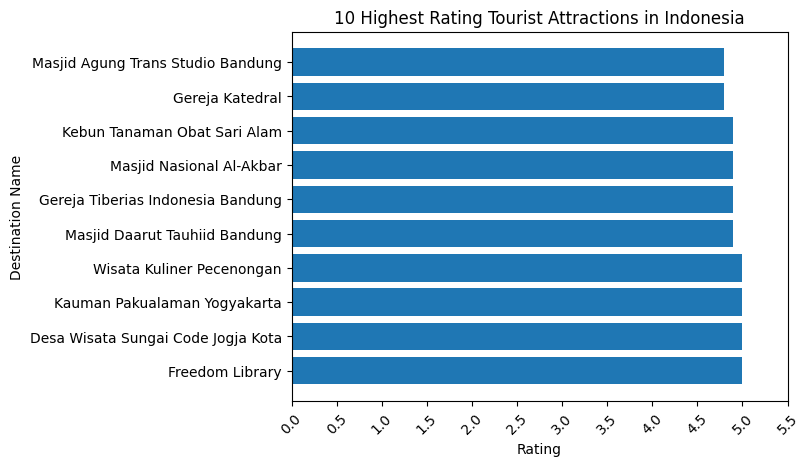

In [ ]:
plt.barh(
    y = highest_rating_df['Place_Name'].head(10),
    width = (highest_rating_df['Rating']).head(10)
)
plt.title('10 Highest Rating Tourist Attractions in Indonesia')
plt.xticks(np.arange(0, 6, 0.5), rotation = 45)
plt.xlabel('Rating')
plt.ylabel('Destination Name')
plt.show()

### Top 10 Number of Visitors Across All Cities

Now, we want to see what is the most visited tourism destination across all cities with their rating and price.

In [ ]:
tourism_destination_df = pd.merge(
    left = tourism_with_id_df,
    right = tourism_rating_df,
    how = 'left',
    on = ["Place_Id"]
)

total_visitor_df = tourism_destination_df.groupby(by = 'Place_Name').agg({
    'Place_Id': 'count',
    'Rating': 'mean',
    'Price': 'max'
}).sort_values(by = 'Place_Id', ascending = False)
total_visitor_df.rename(columns = {'Place_Id': 'Number_of_visit(s)'}, inplace = True)
total_visitor_df.head(10)

,Number_of_visit(s),Rating,Price
Place_Name,,,
Gunung Lalakon,39,4.8,0
Pantai Parangtritis,37,4.5,10000
Gereja Perawan Maria Tak Berdosa Surabaya,37,4.8,10000
Taman Sungai Mudal,36,4.6,10000
Pantai Kesirat,34,4.6,5000
Taman Film,33,4.3,0
Pantai Marina,33,4.1,3000
Geoforest Watu Payung Turunan,33,4.5,0
Wisata Kuliner Pecenongan,33,5.0,0


We see that Gunung Lalakon from Bandung is the most popular tourism destination among others across all cities with rating of 4.8 and free of charge!

### Comparison of Free Tourism Destinations Across All Cities

Since each city has free tourism destinations, we want to know how many free tourism destinations compared to other cities. We also want to compare how many free tourism destinations compared to paid tourism destinations in their respective cities.

First, we will make two tuples containing total of paid and free tourism destinations respectively.

In [ ]:
non_free_tourism_destination = (
    tourism_with_id_df['City'].value_counts()['Yogyakarta'] - free_yogyakarta_df['Price'].value_counts()[0],
    tourism_with_id_df['City'].value_counts()['Bandung'] - free_bandung_df['Price'].value_counts()[0],
    tourism_with_id_df['City'].value_counts()['Jakarta'] - free_jakarta_df['Price'].value_counts()[0],
    tourism_with_id_df['City'].value_counts()['Semarang'] - free_semarang_df['Price'].value_counts()[0],
    tourism_with_id_df['City'].value_counts()['Surabaya'] - free_surabaya_df['Price'].value_counts()[0]
)

free_tourism_destination = (
    free_yogyakarta_df['Price'].value_counts()[0],
    free_bandung_df['Price'].value_counts()[0],
    free_jakarta_df['Price'].value_counts()[0],
    free_semarang_df['Price'].value_counts()[0],
    free_surabaya_df['Price'].value_counts()[0]
)

Then, we will plot it into the vertical bar

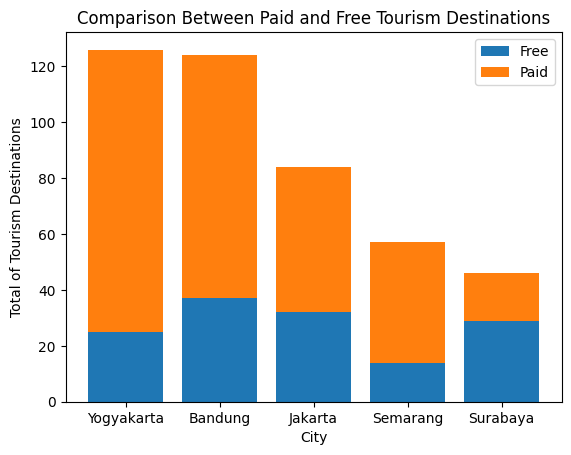

In [ ]:
plot_1 = plt.bar(np.arange(5), free_tourism_destination)
plot_2 = plt.bar(np.arange(5), non_free_tourism_destination, bottom = free_tourism_destination)
plt.title('Comparison Between Paid and Free Tourism Destinations')
plt.xticks(np.arange(5), ('Yogyakarta', 'Bandung', 'Jakarta', 'Semarang', 'Surabaya'))
plt.xlabel('City')
plt.ylabel('Total of Tourism Destinations')
plt.legend((plot_1[0], plot_2[0]), ('Free', 'Paid'))
plt.show()

From the plot, we see that eventhough Surabaya has the least tourism destinations among other cities, it relatively has higher total of free tourism destinations compared to other cities.

## Conclusion

1. Here are the most expensive tourism destination in each city.
  - Pulau Pelangi in Jakarta with the cost of Rp900.000,00.
  - Goa Jomblang in Yogyakarta with the cost of Rp500.000,00.
  - Mountain View Golf Club in Bandung with the cost of Rp375.000,00.
  - Kampoeng Kopi Banaran	in Semarang with the cost of Rp200.000,00.
  - Atlantis Land in Surabaya	with the cost of Rp125.000,00.
2. Each city has free tourism destinations. Bandung has 37 free tourism destinations, making it has the highest total of free tourism destinations. Meanwhile, Semarang has 14 free tourism destinations, making it has the lowest total of free tourism destinations.
3. There are 4 tourism destinations that have perfect 5.0 rating and free. They are Freedom Library, Desa Wisata Sungai Code Jogja Kota, Kauman Pakualaman Yogyakarta, and Wisata Kuliner Pecenongan.
4. Here are the most visited tourism destination in each city.
  - Pantai Parangtritis	in Yogyakarta, having 37 visitors with rating	4.5 and price of Rp10.000,00.
  - Gunung Lalakon in Bandung, having 39 visitors with rating of 4.8 and free.
  - Wisata Kuliner Pecenongan	in Jakarta, having 33 visitors with rating of 5.0	and free.
  - Grand Maerakaca	and Pantai Marina in Semarang, having 33 visitors with rating of 4.4 and 4.1 and price of Rp15.000,00 and Rp3.000,00 respectively.
  - Gereja Perawan Maria Tak Berdosa Surabaya in Surabaya, having	37 with rating of 4.8	and price of Rp10.000,00.